# Plot SST of Gulf Stream for proposal paper

Used nb from [Dr. Chelle Gentemann](https://github.com/pangeo-gallery/osm2020tutorial/tree/master/AWS-notebooks)

[url](https://nbviewer.jupyter.org/github/pangeo-gallery/osm2020tutorial/blob/master/AWS-notebooks/aws_access_SST_data_examples.ipynb)

In [1]:
# filter some warning messages
import warnings 
warnings.filterwarnings("ignore") 

#libraries
import datetime as dt
import xarray as xr
import fsspec
import s3fs
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
# make datasets display nicely
xr.set_options(display_style="html")  

import dask
from dask.distributed import performance_report, Client, progress

#magic fncts #put static images of your plot embedded in the notebook
%matplotlib inline  
plt.rcParams['figure.figsize'] = 12, 6
%config InlineBackend.figure_format = 'retina' 

In [2]:
from dask_gateway import Gateway
g = Gateway()
cluster = g.connect(g.list_clusters()[0].name)
client = cluster.get_client()

In [3]:
client

Client Scheduler: gateway://traefik-gcp-uscentral1b-staging-dask-gateway.staging:80/staging.b7468134e950442b8d312b8be71c2ef8 Dashboard: /services/dask-gateway/clusters/staging.b7468134e950442b8d312b8be71c2ef8/status,Cluster Workers: 20 Cores: 40 Memory: 160.00 GiB


In [8]:
client.close()
cluster.close()

In [4]:
%%time
file_location = 's3://mur-sst/zarr'

ikey = fsspec.get_mapper(file_location, anon=True)

ds_sst = xr.open_zarr(ikey,consolidated=True)

ds_sst

CPU times: user 4.22 s, sys: 214 ms, total: 4.44 s
Wall time: 12.8 s


,Array,Chunk
Bytes,15.19 TiB,245.78 MiB
Shape,"(6443, 17999, 36000)","(6443, 100, 100)"
Count,64801 Tasks,64800 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,15.19 TiB,245.78 MiB
Shape,"(6443, 17999, 36000)","(6443, 100, 100)"
Count,64801 Tasks,64800 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [6]:
ds_sst.analysed_sst

,Array,Chunk
Bytes,15.19 TiB,245.78 MiB
Shape,"(6443, 17999, 36000)","(6443, 100, 100)"
Count,64801 Tasks,64800 Chunks
Type,float32,numpy.ndarray


In [10]:
ds_sst.sel(lon=slice(-75, 20), lat=slice(20, 75))

,Array,Chunk
Bytes,1.23 TiB,245.78 MiB
Shape,"(6443, 5501, 9501)","(6443, 100, 100)"
Count,70177 Tasks,5376 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,1.23 TiB,245.78 MiB
Shape,"(6443, 5501, 9501)","(6443, 100, 100)"
Count,70177 Tasks,5376 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [20]:
ds_sst.analysed_sst.sel(lon=slice(-75, -40), lat=slice(20, 55))[0]

<xarray.DataArray 'analysed_sst' (lat: 3501, lon: 3501)>
dask.array<getitem, shape=(3501, 3501), dtype=float32, chunksize=(100, 100), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 20.0 20.01 20.02 20.03 ... 54.97 54.98 54.99 55.0
  * lon      (lon) float32 -75.0 -74.99 -74.98 -74.97 ... -40.02 -40.01 -40.0
    time     datetime64[ns] 2002-06-01T09:00:00
Attributes:
    comment:        "Final" version using Multi-Resolution Variational Analys...
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_max:      32767
    valid_min:      -32767

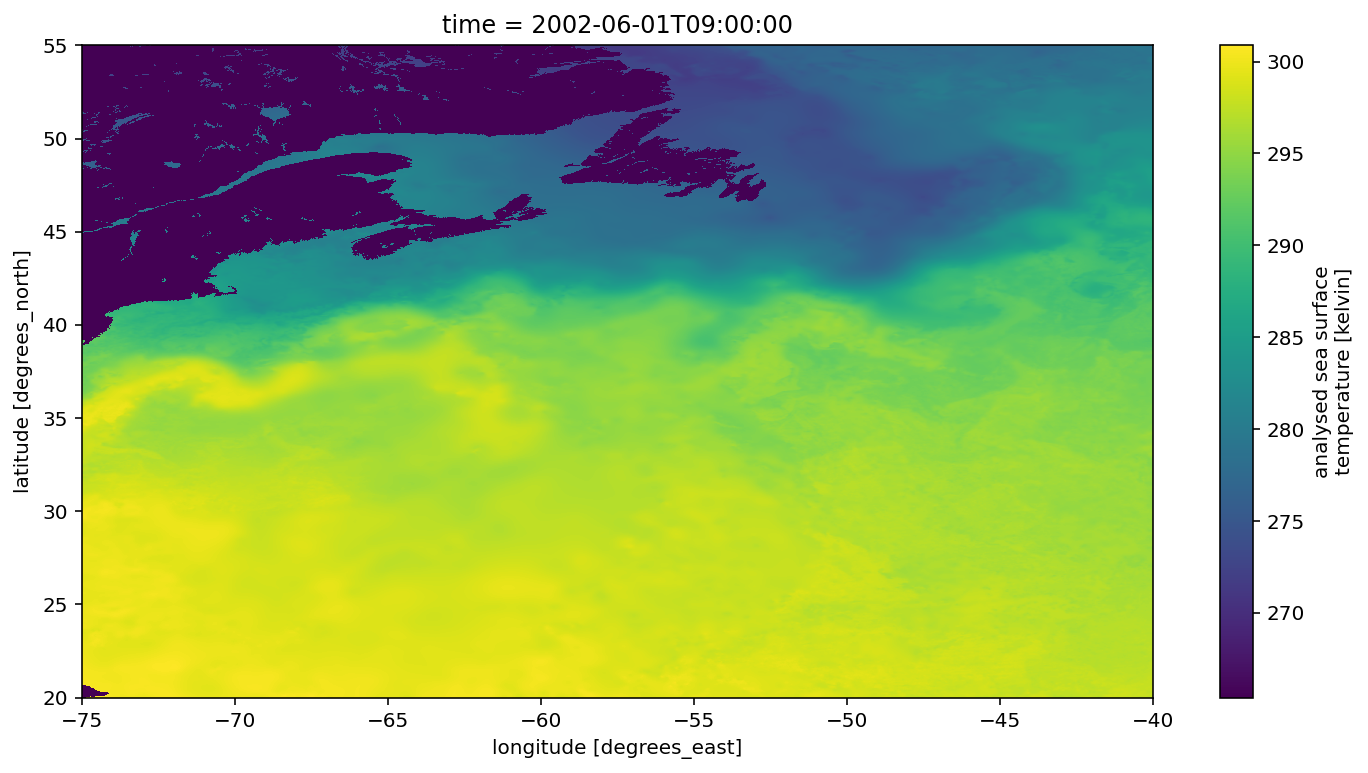

In [21]:
ds_sst.analysed_sst.sel(lon=slice(-75, -40), lat=slice(20, 55))[0].plot()

In [31]:
(ds_sst.mask==2).sel(lon=slice(-90, -50), lat=slice(10, 65))[0]

<xarray.DataArray 'mask' (lat: 5501, lon: 4001)>
dask.array<getitem, shape=(5501, 4001), dtype=bool, chunksize=(100, 100), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 10.0 10.01 10.02 10.03 ... 64.97 64.98 64.99 65.0
  * lon      (lon) float32 -90.0 -89.99 -89.98 -89.97 ... -50.02 -50.01 -50.0
    time     datetime64[ns] 2002-06-01T09:00:00

In [28]:
ds_sst.mask.sel(lon=slice(-90, -50), lat=slice(10, 65))[0]

<xarray.DataArray 'mask' (lat: 5501, lon: 4001)>
dask.array<getitem, shape=(5501, 4001), dtype=int8, chunksize=(100, 100), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 10.0 10.01 10.02 10.03 ... 64.97 64.98 64.99 65.0
  * lon      (lon) float32 -90.0 -89.99 -89.98 -89.97 ... -50.02 -50.01 -50.0
    time     datetime64[ns] 2002-06-01T09:00:00
Attributes:
    comment:        mask can be used to further filter the data.
    flag_masks:     [1, 2, 4, 8, 16]
    flag_meanings:  1=open-sea, 2=land, 5=open-lake, 9=open-sea with ice in t...
    flag_values:    [1, 2, 5, 9, 13]
    long_name:      sea/land field composite mask
    source:         GMT "grdlandmask", ice flag from sea_ice_fraction data
    valid_max:      31
    valid_min:      1

In [5]:
sst_masked = (ds_sst.analysed_sst-273.15).where(ds_sst.mask!=2).sel(lon=slice(-90, -50), lat=slice(10, 65))[0].load()

In [6]:
sst_masked.to_netcdf('sst_masked.nc')

In [39]:
sst_masked

<xarray.DataArray 'analysed_sst' (lat: 5501, lon: 4001)>
array([[27.141998, 27.154999, 27.168   , ..., 27.027008, 27.039001,
        27.049011],
       [27.144012, 27.156006, 27.170013, ..., 27.027008, 27.039001,
        27.050995],
       [27.145996, 27.15799 , 27.17099 , ..., 27.027008, 27.040985,
        27.053009],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 10.0 10.01 10.02 10.03 ... 64.97 64.98 64.99 65.0
  * lon      (lon) float32 -90.0 -89.99 -89.98 -89.97 ... -50.02 -50.01 -50.0
    time     datetime64[ns] 2002-06-01T09:00:00

In [ ]:
sst_masked.plot(cmap='coolwarm', 
                cbar_kwargs={'shrink':0.8, 'label':'Sea Surface Temperature [˚C]'})
plt.title('SST of Gulf Stream from MUR satellite data')
plt.xlabel('Longitude')
plt.ylabel('Latitude');

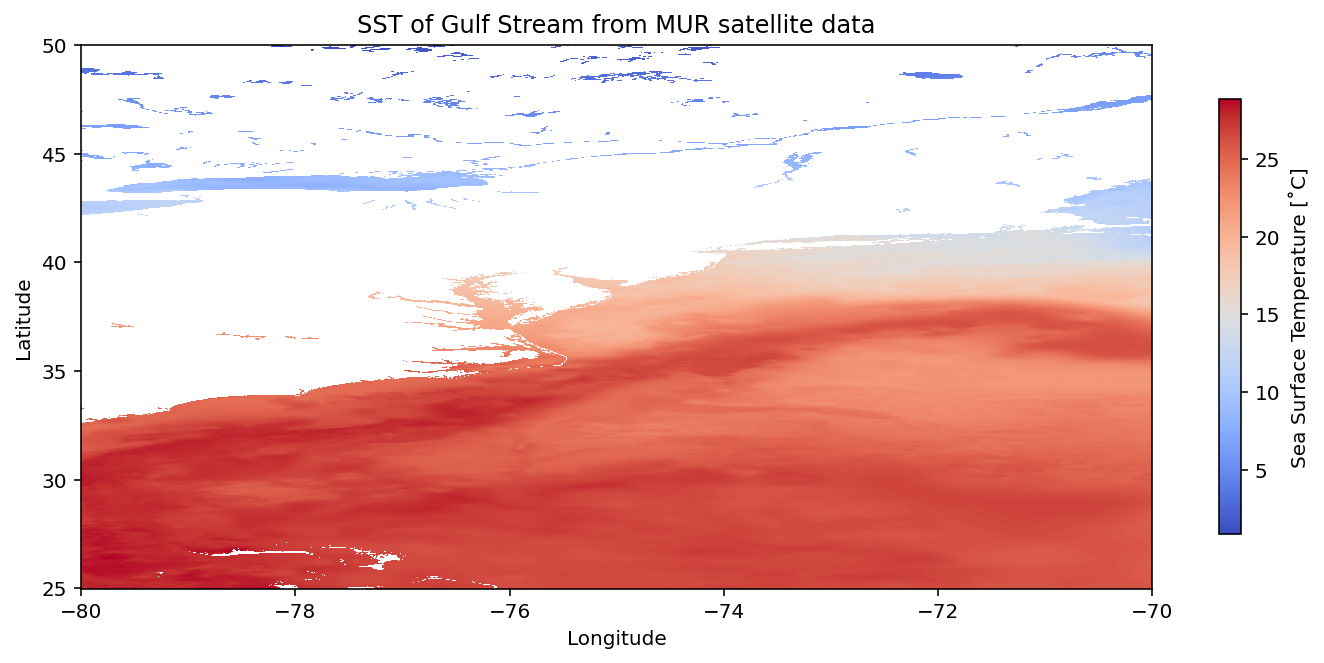

In [13]:
#plt.figure(figsize=(12,5))
sst_masked.sel(lon=slice(-80, -70), lat=slice(25, 50)).plot(cmap='coolwarm', 
                                                            cbar_kwargs={'shrink':0.8, 'label':'Sea Surface Temperature [˚C]'})
plt.title('SST of Gulf Stream from MUR satellite data')
plt.xlabel('Longitude')
plt.ylabel('Latitude');

In [10]:
import cartopy.crs as ccrs #cartopy coord ref sys
import cartopy
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

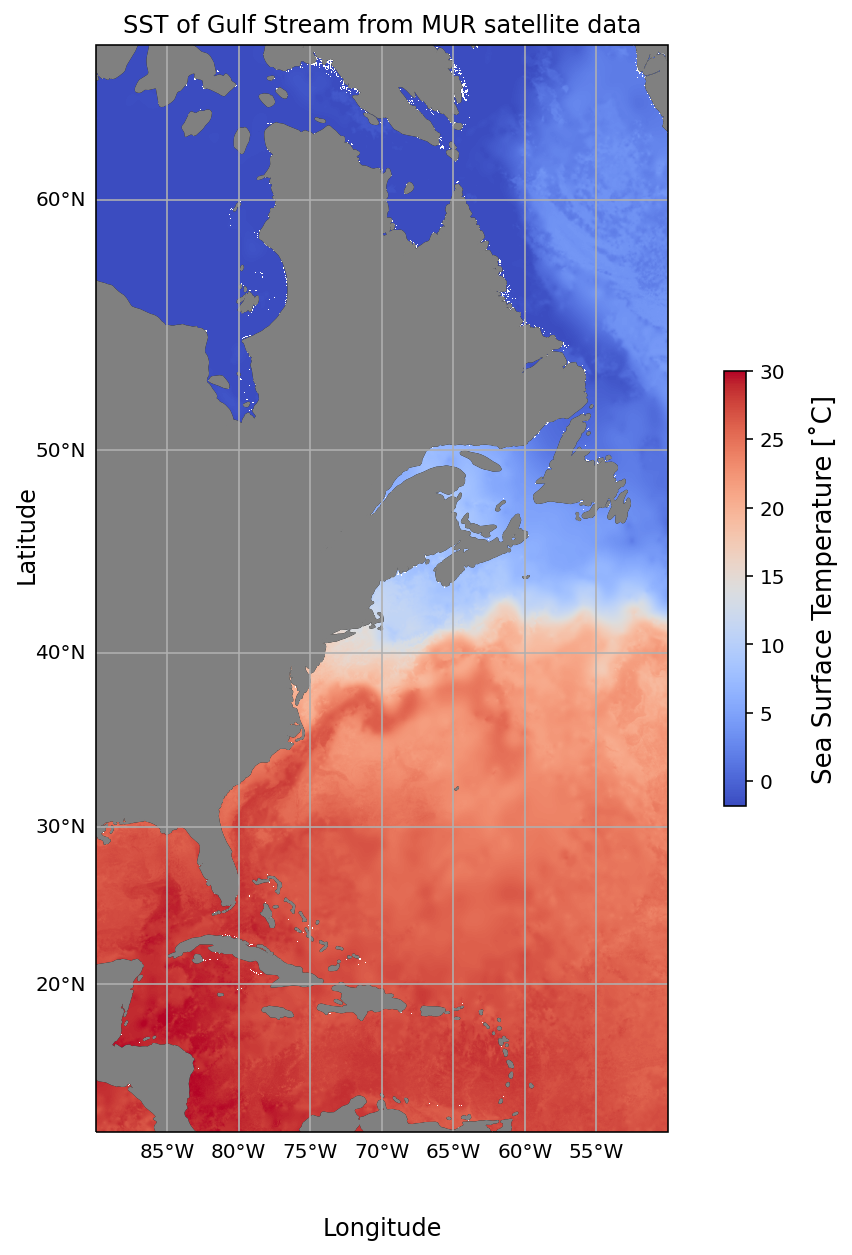

In [11]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection=proj))

ax.set_extent([-90, -50, 10, 65], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(cfeature.LAND, facecolor='0.8', edgecolor='k')

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))

im = ax.pcolormesh(sst_masked.lon, sst_masked.lat, sst_masked, transform=ccrs.PlateCarree(), cmap='coolwarm', vmax=30)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label("Sea Surface Temperature [˚C]", labelpad=12, fontsize=13)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

ax.text(-0.1, 0.55, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=12)
ax.text(0.5, -0.1, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=12)

plt.title('SST of Gulf Stream from MUR satellite data', fontsize=12);